## Дифференциальная задача

$$ \frac{\delta u}{\delta t} + \frac{\delta u}{\delta x}= \cos(x)$$
$$ u(x,0) = \ln(1 + x^2) + sin(x)$$ $$ u(0,t) = \ln(1 + t^2) $$

## Разностная схема

$$ D_h = [(x_l, t^n): x_l = hl, t^n = \tau n,  hL = 1, \tau N = 1] $$
$$ u_l^{n+1} = u_l^n - \frac{\tau}{h}(u_l^n - u_{l-1}^n) + \tau cos(x)$$
$$ u_l^0 = \ln(1 + x_l^2) + sin(x_l) $$ $$ u_0^n = \ln(1 + (t^n)^2)  $$

## Решение дифференциальной задачи
$$u(x,t) = \ln(1 + t^2 + x^2 - 2xt) + sin(x)$$

## Проверим разностную схему на аппроксимацию

$$ [\frac{\delta ^2 u}{\delta ^2 t}]_l^n\frac{\tau}{2}  - [\frac{\delta u}{\delta x}]_l^n\frac{h}{2} + O(\tau ^2 + h^2) = |r_l^n| $$

Видим, что она порядка $$O(\tau , h)$$

Попробуем увеличить порядок аппроксимации, не меняя шаблон.
Получаем:
$$ u_l^{n+1} = u_l^n - \frac{\tau}{h}(u_l^n - u_{l-1}^n) + \tau cos(x) + \frac{\tau ^2}{2} sin(x)$$
Причем необходимое условие $$h = \tau$$

## Проверим на устойчивость
Получаем условие устойчивости $$\tau <= h$$

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [2]:
def orig_func(x,t):
    return(np.log(1 + x**2 + t**2 - 2*x*t) + np.sin(x))

In [3]:
def calc_border_t(t):
    return(np.log(1+t**2))
def calc_border_x(x):
    return(np.log(1+x**2) + np.sin(x))

In [4]:
def create_net(Nx=11,Nt=11):
    x = np.linspace(0,1,Nx)
    t = np.linspace(0,1,Nt)
    U_net = np.ndarray(shape = (Nt,Nx))
    U_orig = np.ndarray(shape = (Nt,Nx))
    for i in range(Nx):
        for j in range(Nt):
            U_orig[j,i] = orig_func(x[i],t[j])
    for i in range(Nx):
        U_net[0,i] = calc_border_x(x[i]) 
        
    for i in range(Nt):
        U_net[i,0] = calc_border_t(t[i])
    net = []
    for i in range(Nx):
        for j in range(Nt):
            net.append([t[j],x[i]])
    return U_net,U_orig, x, t, np.array(net)

In [5]:
def solve_net(U_net,x,t):
    Nt = U_net.shape[0]
    Nx = U_net.shape[1]
    h = abs(x[1]-x[0])
    tau = abs(t[1]-t[0])
    for i in range(1,Nx):
        for j in range(1,Nt):
            U_net[j,i] = U_net[j-1,i] - tau/h * (U_net[j-1,i] - U_net[j-1,i-1]) + tau*np.cos(x[i])
            
def solve_net_better(U_net,x,t):
    Nt = U_net.shape[0]
    Nx = U_net.shape[1]
    U_net_better = U_net.copy()
    h = np.abs(x[1]-x[0])
    tau = np.abs(t[1]-t[0])
    for i in range(1,Nx):
        for j in range(1,Nt):
            U_net_better[j,i] = U_net_better[j-1,i] - tau/h * (U_net_better[j-1,i] - U_net_better[j-1,i-1]) + tau*np.cos(x[i]) + 1/2*(tau**2)*np.sin(x[i])
    return U_net_better

In [6]:
U_net, U_orig, x, t, net = create_net(Nt=11,Nx=11)

In [7]:
solve_net(U_net, x, t)

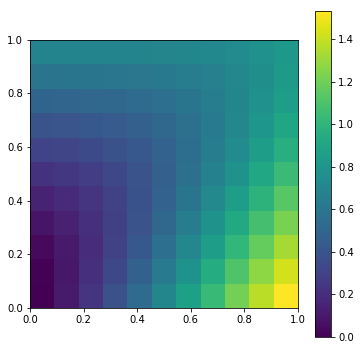

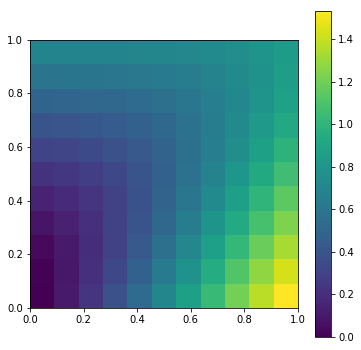

In [8]:
fig = plt.figure(figsize = (6,6))
plt.imshow(U_net, extent=(-0, 1,0, 1), origin='lower', vmax=U_orig.max(), vmin=U_orig.min())
plt.colorbar()
plt.show()
fig = plt.figure(figsize = (6,6))
plt.imshow(U_orig, extent=(-0, 1,0, 1), origin='lower',vmax=U_orig.max(), vmin=U_orig.min())
plt.colorbar()
plt.show()

In [9]:
U_net[-1]

array([ 0.69314718,  0.69282726,  0.69220332,  0.69181684,  0.69263152,
        0.69604863,  0.70385865,  0.71810056,  0.74081424,  0.77370486,
        0.81778476])

In [12]:
U_orig[-1]

array([ 0.69314718,  0.69316026,  0.69336557,  0.69429633,  0.69690304,
        0.70256909,  0.71306248,  0.73039538,  0.7565768 ,  0.79327724,
        0.84147098])

In [13]:
U_net_better = solve_net_better(U_net,x,t)

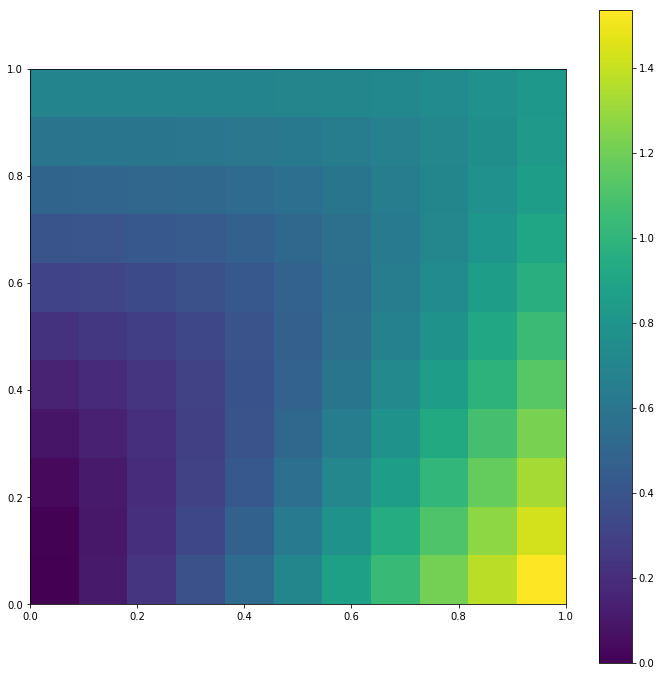

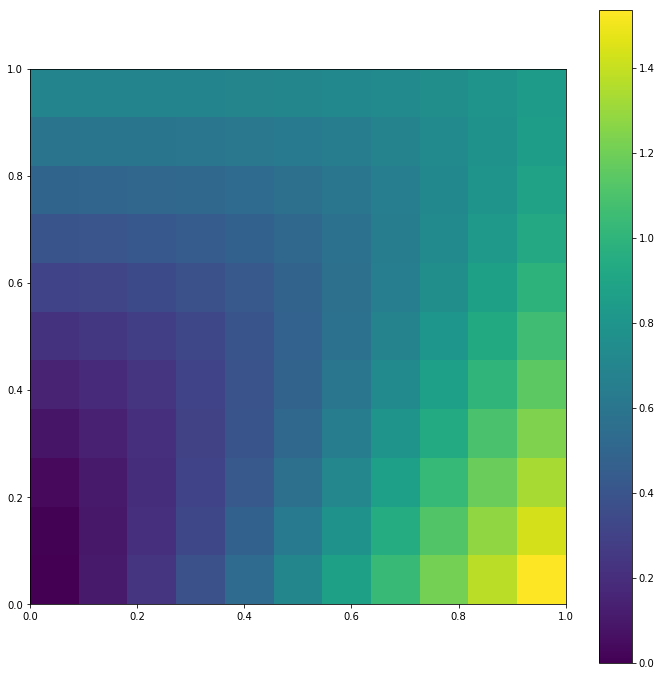

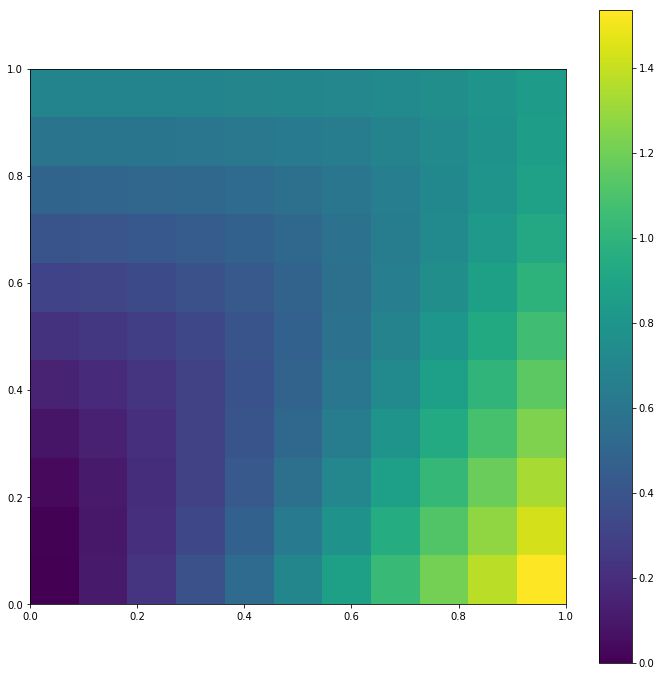

In [133]:
fig = plt.figure(figsize = (12,12))
plt.imshow(U_net, extent=(-0, 1,0, 1), origin='lower',vmax=U_orig.max(), vmin=U_orig.min())
plt.colorbar()
plt.show()
fig = plt.figure(figsize = (12,12))
plt.imshow(U_net_better, extent=(-0, 1,0, 1), origin='lower',vmax=U_orig.max(), vmin=U_orig.min())
plt.colorbar()
plt.show()
fig = plt.figure(figsize = (12,12))
plt.imshow(U_orig, extent=(-0, 1,0, 1), origin='lower',vmax=U_orig.max(), vmin=U_orig.min())
plt.colorbar()
plt.show()

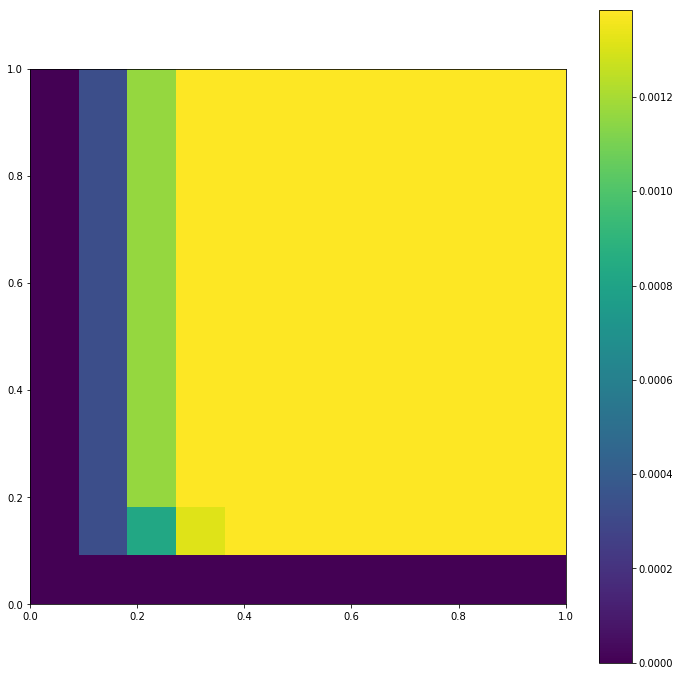

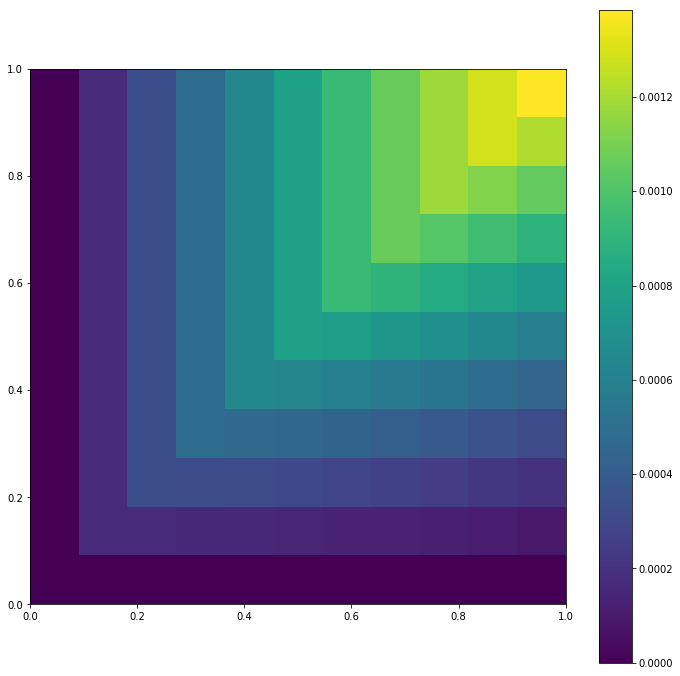

In [134]:
fig = plt.figure(figsize = (12,12))
plt.imshow(np.abs(U_net - U_orig), extent=(-0, 1,0, 1), origin='lower', vmax = np.abs(U_net_better - U_orig).max(),vmin=0)
plt.colorbar()
plt.show()
fig = plt.figure(figsize = (12,12))
plt.imshow(np.abs(U_net_better - U_orig), extent=(-0, 1,0, 1), origin='lower',vmax = np.abs(U_net_better - U_orig).max(),vmin=0)
plt.colorbar()
plt.show()

In [135]:
np.abs(U_net_better - U_orig).max()

0.0013831774788487516

In [136]:
np.abs(U_net - U_orig).max()

0.023686227426069739

In [18]:
np.abs(U_net - U_orig)[-1]

array([ 0.        ,  0.00056218,  0.00211093,  0.00507075,  0.00972228,
        0.01604745,  0.0235978 ,  0.03145875,  0.03836677,  0.04297911,
        0.04421733])

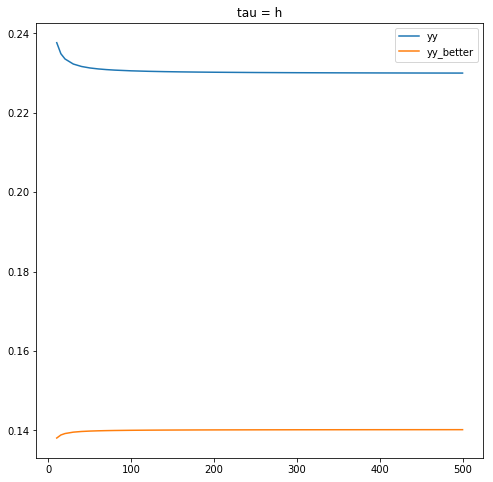

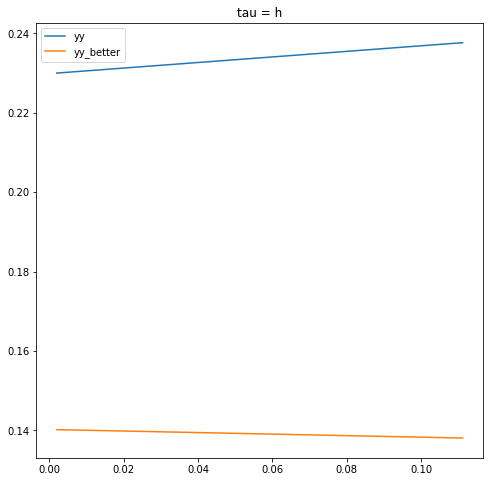

In [137]:
yy = []
yy_better = []
xx = [10,15,20,30,40,50,60,70,80,100,120,140,160,180,200,250,300,350,400,450,500]
hh = []
for i in xx:
    U_net, U_orig, x, t, net = create_net(Nt=i,Nx=i)
    solve_net(U_net, x, t)
    tau = np.abs(t[1]-t[0])
    h = np.abs(x[1]-x[0])
    hh.append(h)
    U_net_better = solve_net_better(U_net,x,t)
    yy_better += [np.abs(U_net_better - U_orig).max()/h**2]
    yy += [np.abs(U_net - U_orig).max()/h]

fig = plt.figure(figsize=(8,8))
plt.plot(xx,yy)
plt.plot(xx,yy_better)
plt.title('tau = h')
plt.legend(('yy','yy_better'))
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(hh,yy)
plt.plot(hh,yy_better)
plt.title('tau = h')
plt.legend(('yy','yy_better'))
plt.show()

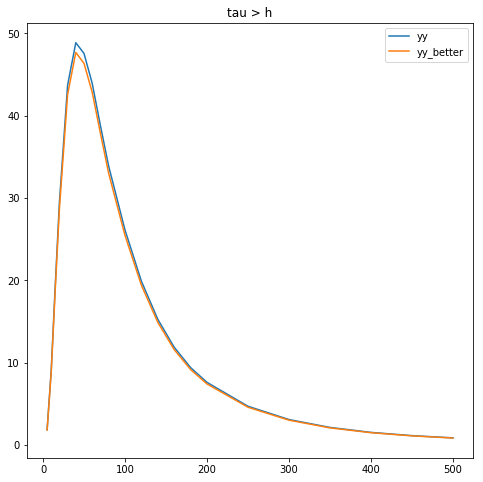

In [532]:
yy = []
yy_better = []
xx = [5,10,15,20,30,40,50,60,70,80,100,120,140,160,180,200,250,300,350,400,450,500]
for i in xx:
    U_net, U_orig, x, t, net = create_net(Nt=i,Nx=i+10)
    solve_net(U_net, x, t)
    U_net_better = solve_net_better(U_net,x,t)
    yy_better += [np.abs(U_net_better - U_orig).max()]
    yy += [np.abs(U_net - U_orig).max()]
    
fig = plt.figure(figsize=(8,8))    
plt.plot(xx,yy)
plt.plot(xx,yy_better)
plt.title('tau > h')
plt.legend(('yy','yy_better'))
plt.show()

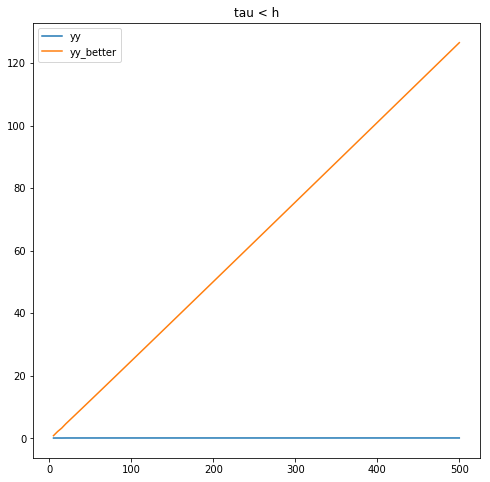

In [81]:
yy = []
yy_better = []
xx = [5,10,15,20,30,40,50,60,70,80,100,120,140,160,180,200,250,300,350,400,450,500]
for i in xx:
    U_net, U_orig, x, t, net = create_net(Nt=i+int(i/2),Nx=i)
    solve_net(U_net, x, t)
    tau = np.abs(t[1]-t[0])
    h = np.abs(x[1]-x[0])
    U_net_better = solve_net_better(U_net,x,t)
    yy_better += [np.abs(U_net_better - U_orig).max()/(h**2)]
    yy += [np.abs(U_net - U_orig).max()/(h)]
    
fig = plt.figure(figsize=(8,8))    
plt.plot(xx,yy)
plt.plot(xx,yy_better)
plt.legend(('yy','yy_better'))
plt.title('tau < h')
plt.show()

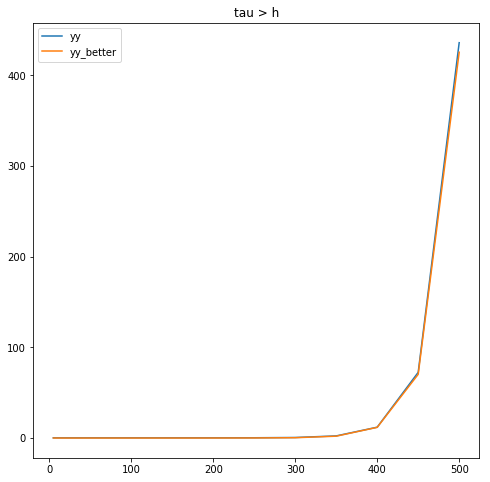

In [84]:
yy = []
yy_better = []
xx = [5,10,15,20,30,40,50,60,70,80,100,120,140,160,180,200,250,300,350,400,450,500]
for i in xx:
    U_net, U_orig, x, t, net = create_net(Nt=i,Nx=i+int(i/50))
    solve_net(U_net, x, t)
    U_net_better = solve_net_better(U_net,x,t)
    tau = np.abs(t[1]-t[0])
    h = np.abs(x[1]-x[0])
    yy_better += [np.abs(U_net_better - U_orig).max()/h]
    yy += [np.abs(U_net - U_orig).max()/h]
    
fig = plt.figure(figsize=(8,8))    
plt.plot(xx,yy)
plt.plot(xx,yy_better)
plt.title('tau > h')
plt.legend(('yy','yy_better'))
plt.show()